In [61]:
from sklearn.decomposition import TruncatedSVD, PCA
import pandas as pd
import glob

matrix_list = []
for date in ["220605", "220628"]:
    for i in glob.glob ("/home/goldpm1/OPLL/0.rnaraw/04.matrix/" + date + "/*.tsv"):
        matrix_list.append (i)


df = pd.read_csv (matrix_list[0], sep = "\t", header = None, index_col = 0)

for i, filename in enumerate (matrix_list):
    df_ind = pd.read_csv (filename, sep = "\t", header = None, index_col = 0)

    temp_columns = list ( df.columns ) + [ filename.split("/")[-1] ]
    df = pd.merge (df , df_ind, left_index = True, right_index = True, how = "outer")
    df.columns = temp_columns

df = df.drop ( columns =  [1] )
df.iloc[0:20]

df = df.transpose()




OLF-2.tsv
OLF-1.tsv
OLF.tsv


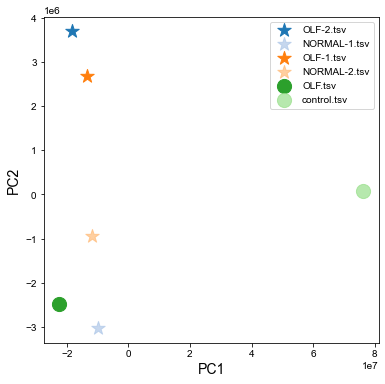

In [87]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import palettable

tabl = palettable.tableau.Tableau_20.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors
colorlist = [i for i in tabl]

fig, ax = plt.subplots (figsize = (6, 6))

matplotlib.rcParams["font.family"] = 'arial'

pca = PCA(n_components=2)
pca.fit(df)
pca_df = np.array ( pca.transform(df) ) 

ax.set_xlabel("PC1", fontdict = {"fontsize" : 14})
ax.set_ylabel("PC2", fontdict = {"fontsize" : 14})

batch = {"OLF.tsv" : 0, "control.tsv" : 0, "OLF-1.tsv" : 1, "NORMAL-1.tsv" : 1, "OLF-2.tsv" : 1, "NORMAL-2.tsv" : 1}
markerlist = ["o", "*", "+", "-"]

for i in range (len (pca_df)):
    if "OLF" in df.index [i]:
        print (  df.index [i]  )
        ax.scatter(pca_df[i , 0] * 2, pca_df[ i , 1] * 2, s = 200, marker = markerlist [ batch [ df.index [i] ]], label = df.index [ i ] , color = colorlist [ i  ] )
    else:
        ax.scatter(pca_df[i , 0] * 2, pca_df[ i , 1] * 2, s = 200, marker = markerlist [ batch [ df.index [i] ]], label = df.index [ i ] , color = colorlist [ i ], alpha = 0.7 )
ax.legend()

In [71]:
df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,__no_feature,__ambiguous,__too_low_aQual,__not_aligned,__alignment_not_unique
OLF-2.tsv,393,93,3,78063,114,59,5,10,8196,114,...,39,9770,15609,16536,9708,17820953,1551830,7398294,0,0
NORMAL-1.tsv,269,77,19,52586,107,64,10,34,3726,82,...,114,10552,23445,18767,6824,22130468,1668471,9019549,0,0
OLF-1.tsv,273,102,1,81695,146,66,5,4,8967,43,...,49,8568,18415,15058,8557,20356606,1574732,7772926,0,0
NORMAL-2.tsv,211,55,14,44419,122,60,9,86,2582,63,...,77,6346,30027,21432,6629,21124812,1319890,9454123,0,0
OLF.tsv,582,64,2,89056,90,80,0,8,2356,107,...,12,14637,9329,15101,13733,15977990,1621523,10978059,0,0
control.tsv,242,358,985,5349,16,814,0,37,1401,435,...,1211,4200,2311,2191,2682,65082704,447353,5724949,0,0
